Code written in colabboration with Martin Hansen Skjelvareid.

In [1]:
# Disable TensorFlow debugging info and warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2: Info and warnings not displayed 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.ensemble
import pickle

In [3]:
# Disable GPUs (in case of Tensorflow trying to use GPUs and raising errors)
tf.config.set_visible_devices([], 'GPU')

In [4]:
# Paths
tiles_dataset_path = '/Users/siljegrue/Downloads/tiles'

In [5]:
# Load dataset (or, rather, pointer to dataset)
dataset = tf.data.experimental.load(tiles_dataset_path)

In [6]:
# Show dataset details
n_tiles = int(dataset.cardinality())
print(f'Dataset specification: {dataset}')
print(f'Number of tiles: {n_tiles}')

Dataset specification: <_LoadDataset element_spec=(TensorSpec(shape=(128, 128, 8), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128), dtype=tf.int32, name=None))>
Number of tiles: 459


In [7]:
# Shuffle dataset (tiles are originally ordered by image)
dataset = dataset.shuffle(buffer_size=n_tiles)

In [8]:
def collect_dataset_spectra(dataset):
    """ Collect annotated pixels in feature matrix X and label vector y """
    pixels_list = []
    label_list = []
    for image_tile,label_tile in dataset:
        annotated_mask = (label_tile > 0) # Label 0 corresponds to background (not annotated)
        pixels_list.append(image_tile[annotated_mask])
        label_list.append(label_tile[annotated_mask])
    X = np.concatenate(pixels_list)
    y = np.concatenate(label_list)
    return (X,y)

In [9]:
# Collect X and Y and store in arrays:

X , y = collect_dataset_spectra(dataset)

Train RF model with the following hyperparameters:

n_estimators = 20

max_samples = 0.6 

min_samples_leaf = 15

In [14]:
# Create a random forest model
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=20, min_samples_leaf=15,max_samples=0.6)       

In [15]:
# split into training and testing dataset:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,train_size=0.7)

In [16]:
# Train classifier 
import time
start = time.time()
rfc.fit(X_train,y_train)
end = time.time()
print("It took" ,(end-start)/60, "minutes to train the model")


It took 2.966372179985046 minutes to train the model


In [17]:
rfc.feature_importances_

array([0.30833162, 0.22477472, 0.0991687 , 0.13688232, 0.06576244,
       0.05432049, 0.09557576, 0.01518396])

In [18]:
# Apply it to test dataset
start = time.time()
y_test_pred = rfc.predict(X_test)
end = time.time()
print("It took" ,end-start, "secounds to apply the model on test dataset")

It took 3.6622650623321533 secounds to apply the model on test dataset


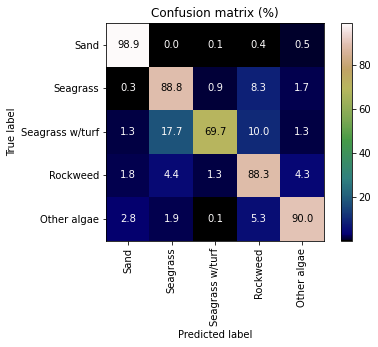

In [19]:
# Show confusion matrix
display_labels = ['Sand', 'Seagrass', 'Seagrass w/turf','Rockweed','Other algae']
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_pred,normalize='true')
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix*100,display_labels=display_labels)
disp.plot(xticks_rotation='vertical',cmap='gist_earth',values_format='.1f')
plt.title('Confusion matrix (%)')
plt.show()

In [20]:
# save the model to file
filename = 'rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [21]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [22]:
rfc.feature_importances_

array([0.30833162, 0.22477472, 0.0991687 , 0.13688232, 0.06576244,
       0.05432049, 0.09557576, 0.01518396])

In [23]:
loaded_model.feature_importances_

array([0.30833162, 0.22477472, 0.0991687 , 0.13688232, 0.06576244,
       0.05432049, 0.09557576, 0.01518396])